In [ ]:
!pip install better_profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.2 MB/s 


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
from textblob import TextBlob 
from wordcloud import WordCloud
from better_profanity import profanity
import re

In [ ]:
df = pd.read_csv('/content/sample_data/Tweet.csv', dtype=object, sep=',', header=None)
# df.drop(columns=["High", "Low", "Close", "Adj Close", "Volume"])
# df.drop(columns='High')
# df.drop(columns='Low')
# df.drop(columns='Adj Close')
df

,0,1,2,3,4,5,6
0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
1,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
2,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
3,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
4,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
...,...,...,...,...,...,...,...
2955504,1079043362345418753,ShortingIsFun,1546098959,What do they do for Tesla? Are they doing vehi...,0,0,1
2955505,1079043602980909056,timbitzen,1546099017,"Unfortunately, perception makes reality. Only ...",0,0,0
2955506,1079043763182415873,ReflexFunds,1546099055,@ReflexFunds estimate: Production 53.6k. Deliv...,3,1,11
2955507,1079043989162999813,DZierler,1546099109,This is a key statement about Optical See-Thro...,0,0,0


In [ ]:
df.columns = df.iloc[0]
df = df[1:]
df

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
1,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
2,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
3,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
4,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
5,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
2955504,1079043362345418753,ShortingIsFun,1546098959,What do they do for Tesla? Are they doing vehi...,0,0,1
2955505,1079043602980909056,timbitzen,1546099017,"Unfortunately, perception makes reality. Only ...",0,0,0
2955506,1079043763182415873,ReflexFunds,1546099055,@ReflexFunds estimate: Production 53.6k. Deliv...,3,1,11
2955507,1079043989162999813,DZierler,1546099109,This is a key statement about Optical See-Thro...,0,0,0


In [ ]:
df.sort_values(by='like_num', ascending=False)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
2403479,992113509742858240,llsethj,1525373267,Nice of @elonmusk to create a buying opportuni...,29,71,999
2301562,973303000365232129,CNBCFastMoney,1520888493,$AMZN and $AAPL are caught in a race to see wh...,19,37,99
2673236,1034980896896688129,TESLAcharts,1535593649,Fun fact.I can personally afford to buy all th...,22,7,99
2919998,1072299002568302593,RiskAndChips,1544490979,14/ Eberhard makes sure to also include his ed...,2,10,99
2919989,1072298984524447744,RiskAndChips,1544490974,"5/ After Musk joined, we begin to see the famo...",1,9,99
...,...,...,...,...,...,...,...
1094361,741984845451034624,Maximum_Pain_cm,1465737947,$AMZN $WY options have the largest change in o...,0,0,0
1094362,741984964506472452,PortfolioBuzz,1465737975,What is it ahead for US Tech Giants? Check wha...,0,0,0
1094363,741985643312615425,tradewithjoe,1465738137,Posted a trade idea in twj_private on this 740...,0,0,0
2955507,1079043989162999813,DZierler,1546099109,This is a key statement about Optical See-Thro...,0,0,0


In [ ]:
df_comp = pd.read_csv('/content/sample_data/Company_Tweet.csv', dtype=object, sep=',', header=None)
df_comp.columns = df_comp.iloc[0]
df_comp = df_comp[1:]
# # df_comp
# df_comp
df_comp

,tweet_id,ticker_symbol
1,550803612197457920,AAPL
2,550803610825928706,AAPL
3,550803225113157632,AAPL
4,550802957370159104,AAPL
5,550802855129382912,AAPL
...,...,...
4336441,1212158772015034369,TSLA
4336442,1212159099632267268,TSLA
4336443,1212159184931717120,TSLA
4336444,1212159838882533376,TSLA


In [ ]:
join_df = pd.merge(df, df_comp, on='tweet_id', how='inner')
join_df = join_df.dropna()
join_df['post_date'] = pd.to_datetime(join_df['post_date'],unit='s')
# join_df['post_date'] = pd.to_datetime(df['post_date']).datetime.date

In [ ]:
join_df

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
4,550443808606126081,aaplstocknews,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
...,...,...,...,...,...,...,...,...
406630,621720838706823168,Stock_Tracker1,2015-07-16 16:39:33,"GILD Gilead Sciences, Inc. Quoteshttp://dlvr.i...",0,0,0,GOOG
406631,621720839642165248,nasdaqfan,2015-07-16 16:39:33,GOOGL Google Inc. - Class A Filingshttp://dlvr...,0,0,0,GOOGL
406632,621720839860260864,IHNewsDesk,2015-07-16 16:39:33,"$NUGT Short Sales Updated Thursday, July 16, 2...",0,0,0,AAPL
406633,621720842557218816,Jake132013,2015-07-16 16:39:34,GOOGL Google Inc. - Class A Filingshttp://dlvr...,0,0,0,GOOGL


In [ ]:
join_df['post_date'] = pd.to_datetime(join_df['post_date'])
join_df['post_date'] = pd.to_datetime(join_df['post_date']).dt.date

In [ ]:
join_df

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,2015-01-01,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
...,...,...,...,...,...,...,...,...
3427725,1079043344582488064,bbnsnews,2018-12-29,Traders Sell Alphabet $GOOGL on Strength $GOOG...,0,0,0,GOOGL
3427726,1079043362345418753,ShortingIsFun,2018-12-29,What do they do for Tesla? Are they doing vehi...,0,0,1,TSLA
3427727,1079043602980909056,timbitzen,2018-12-29,"Unfortunately, perception makes reality. Only ...",0,0,0,TSLA
3427728,1079043763182415873,ReflexFunds,2018-12-29,@ReflexFunds estimate: Production 53.6k. Deliv...,3,1,11,TSLA


In [ ]:
# join_df['engagement'] = join_df.apply(lambda x, (x['comment_num'] + x['retweet_num'] + x['like_num']))
join_df.dropna()
# join_df = join_df.apply(engagement = lambda x: (x['comment_num'] + x['retweet_num'] + x['like_num']))
# join_df = join_df.assign(engagement = lambda x: (int(x['comment_num']) + int(x['retweet_num']) + int(x['like_num']))
rating = []
for i in join_df.index : 
    # rating.append(int(join_df['comment_num'][i]) + int(join_df['like_num'][i]) + int(join_df['retweet_num'][i]))
    rating.append(int(join_df['like_num'][i]))
join_df['engagement'] = rating

In [ ]:
join_df.sort_values(by='engagement', ascending=False)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,engagement
2779707,992113509742858240,llsethj,2018-05-03,Nice of @elonmusk to create a buying opportuni...,29,71,999,TSLA,999
2953893,1020077355346169857,vincent13031925,2018-07-19,"Tesla Spokesperson, Regarding The Earlier Need...",38,256,986,TSLA,986
3380316,1071614035865559042,QTRResearch,2018-12-09,Looks like this will be a hard hitting intervi...,69,111,958,TSLA,958
3005818,1025852237053091840,auto_cynical,2018-08-04,Candidate for best Twitter exchange with a $TS...,19,203,954,TSLA,954
2944084,1018938697415315457,epichedge,2018-07-16,Live view of $AMZN IT department #primeday,7,366,927,AMZN,927
...,...,...,...,...,...,...,...,...,...
1267566,742691616771563521,_peripherals,2016-06-14,"#Apple iOS 10: A Good Mixture of Simplicity, G...",0,0,0,AAPL,0
1267567,742691772338339841,computer_hware,2016-06-14,#Apple announces iOS 10 at WWDC 2016; Here's ...,0,0,0,AAPL,0
1267568,742691772342538242,It_c0nsulting,2016-06-14,"Apple iOS 10: A Good Mixture of Simplicity, #G...",0,0,0,GOOG,0
1267569,742691772350881792,_peripherals,2016-06-14,#Apple announces iOS 10 at WWDC 2016; Here's ...,0,0,0,AAPL,0


In [ ]:
df1 = join_df[join_df['ticker_symbol'].str.contains("AAPL")]
# df[df['Position'].str.contains("PG")]
df_top = df1.sort_values('engagement',ascending = False).groupby(['post_date']).head(100)
df_top = df_top.sort_values('post_date')
df_top

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,engagement
578,550756255686344704,LasVahGoose,2015-01-01,#TMI dude at work telling me his wife accused ...,0,0,1,AAPL,1
481,550716105573269506,OphirGottlieb,2015-01-01,$AAPL Risk into Earnings Rising Early (pic)dat...,0,1,3,AAPL,3
557,550748317760495616,MacHashNews,2015-01-01,Apple quietly increases pricing of Apple Devel...,0,0,1,AAPL,1
559,550749669060407297,SeekingAlpha,2015-01-01,"Long BlackBerry, Short Apple Again In 2015 htt...",0,5,5,AAPL,5
616,550774071210696704,SeekingAlpha,2015-01-01,4 Value Stocks For 2015 http://seekingalpha.co...,0,3,5,AAPL,5
...,...,...,...,...,...,...,...,...,...
3427389,1078885049175437312,JoeHsieh24,2018-12-29,$AAPL Citi agrees with me,0,0,0,AAPL,0
3427390,1078885164124643329,Oakgrovecapital,2018-12-29,Not always. Only when ex post follows a sever...,0,0,0,AAPL,0
3427479,1078959643790098432,MomentumHunter_,2018-12-29,@KoalaBEARR @theoptionsavant how investors&tra...,0,0,0,AAPL,0
3427152,1078813352493748224,AlpacaAlerts,2018-12-29,$AAPL is in Doji Gap Up winning 63.04% in the ...,0,0,0,AAPL,0


In [ ]:
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [ ]:
df = df_top
df['cleaned_tweet'] = [clean_tweet(tw) for tw in df['body']]
df

<ipython-input-18-3d5eefbed3e3>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,engagement,cleaned_tweet
578,550756255686344704,LasVahGoose,2015-01-01,#TMI dude at work telling me his wife accused ...,0,0,1,AAPL,1,dude at work telling me his wife accused him c...
481,550716105573269506,OphirGottlieb,2015-01-01,$AAPL Risk into Earnings Rising Early (pic)dat...,0,1,3,AAPL,3,aapl risk into earnings rising early pic data ...
557,550748317760495616,MacHashNews,2015-01-01,Apple quietly increases pricing of Apple Devel...,0,0,1,AAPL,1,apple quietly increases pricing apple develope...
559,550749669060407297,SeekingAlpha,2015-01-01,"Long BlackBerry, Short Apple Again In 2015 htt...",0,5,5,AAPL,5,long blackberry short apple again 2015 aapl bbry
616,550774071210696704,SeekingAlpha,2015-01-01,4 Value Stocks For 2015 http://seekingalpha.co...,0,3,5,AAPL,5,4 value stocks 2015 aapl alu expe kors pcln qc...
...,...,...,...,...,...,...,...,...,...,...
3427389,1078885049175437312,JoeHsieh24,2018-12-29,$AAPL Citi agrees with me,0,0,0,AAPL,0,aapl citi agrees with me
3427390,1078885164124643329,Oakgrovecapital,2018-12-29,Not always. Only when ex post follows a sever...,0,0,0,AAPL,0,not always only when ex post follows severe co...
3427479,1078959643790098432,MomentumHunter_,2018-12-29,@KoalaBEARR @theoptionsavant how investors&tra...,0,0,0,AAPL,0,how investors traders should view this let it ...
3427152,1078813352493748224,AlpacaAlerts,2018-12-29,$AAPL is in Doji Gap Up winning 63.04% in the ...,0,0,0,AAPL,0,aapl is doji gap up winning 63 04 past


In [ ]:
df = pd.read_csv('/content/sample_data/AAPL_tweets.csv', dtype=object, sep=',', header=None)
df.columns = df.iloc[0]
df = df[1:]
df

,NaN,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,engagement,cleaned_tweet
1,510,550726427164020737,TalkMarkets,2015-01-01,3 #Technology #Stocks That Crushed #Apple In 2...,0,0,2,AAPL,2,3 that crushed 2014 spx aapl msft ibm mu ttwo ...
2,111,550479777006497792,themotleyfool,2015-01-01,"#FoolFaves2014 Lo, how the mighty have fallen?...",0,7,5,AAPL,5,lo how mighty have fallen why future aapls ipa...
3,451,550705849690116096,SwingTradeAlert,2015-01-01,IBD:2015 technology forecasts: Wearable techno...,0,0,3,AAPL,3,ibd 2015 technology forecasts wearable technol...
4,419,550696363407986688,andrewnyquist,2015-01-01,"New Post - ""Apple Stock Pullback: Price Target...",0,3,3,AAPL,3,new post apple stock pullback price targets le...
5,563,550752071243141120,themotleyfool,2015-01-01,"We're shocked, shocked! that Samsung might try...",2,10,9,AAPL,9,were shocked shocked that samsung might try co...
...,...,...,...,...,...,...,...,...,...,...,...
58618,2686025,978790001138946048,KleinmanBHC,2018-03-28,Some examples:$GOOGL 200d test on 2/9 (first s...,0,0,2,AAPL,2,some examples googl 200d test 2 9 first since ...
58619,2687541,978987908639027203,GerberKawasaki,2018-03-28,Or maybe Apple buys Disney. Old media is way t...,1,1,4,AAPL,4,or maybe apple buys disney old media is way to...
58620,2686031,978790758693195777,stockspastor,2018-03-28,Don’t be a sucker for this market. Get in the...,0,1,2,AAPL,2,don t be sucker this market get game with us s...
58621,2688103,979003779067645953,askwarrenbuffet,2018-03-28,"Don't buy that $300 bag to have nothing in it,...",0,1,4,AAPL,4,dont buy that 300 bag have nothing it buy that...


In [ ]:
sentiment_objects = [TextBlob(tweet) for tweet in df['cleaned_tweet']]
df['sentiment_values'] = [tweet.sentiment.polarity for tweet in sentiment_objects]
df
# df['cleaned_tweet']


<ipython-input-21-e29013e3994f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_values'] = [tweet.sentiment.polarity for tweet in sentiment_objects]


,NaN,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,engagement,cleaned_tweet,sentiment_values
1,510,550726427164020737,TalkMarkets,2015-01-01,3 #Technology #Stocks That Crushed #Apple In 2...,0,0,2,AAPL,2,3 that crushed 2014 spx aapl msft ibm mu ttwo ...,-0.100000
2,111,550479777006497792,themotleyfool,2015-01-01,"#FoolFaves2014 Lo, how the mighty have fallen?...",0,7,5,AAPL,5,lo how mighty have fallen why future aapls ipa...,0.200000
3,451,550705849690116096,SwingTradeAlert,2015-01-01,IBD:2015 technology forecasts: Wearable techno...,0,0,3,AAPL,3,ibd 2015 technology forecasts wearable technol...,0.000000
4,419,550696363407986688,andrewnyquist,2015-01-01,"New Post - ""Apple Stock Pullback: Price Target...",0,3,3,AAPL,3,new post apple stock pullback price targets le...,0.136364
5,563,550752071243141120,themotleyfool,2015-01-01,"We're shocked, shocked! that Samsung might try...",2,10,9,AAPL,9,were shocked shocked that samsung might try co...,-0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
58618,2686025,978790001138946048,KleinmanBHC,2018-03-28,Some examples:$GOOGL 200d test on 2/9 (first s...,0,0,2,AAPL,2,some examples googl 200d test 2 9 first since ...,0.166667
58619,2687541,978987908639027203,GerberKawasaki,2018-03-28,Or maybe Apple buys Disney. Old media is way t...,1,1,4,AAPL,4,or maybe apple buys disney old media is way to...,0.333333
58620,2686031,978790758693195777,stockspastor,2018-03-28,Don’t be a sucker for this market. Get in the...,0,1,2,AAPL,2,don t be sucker this market get game with us s...,-0.350000
58621,2688103,979003779067645953,askwarrenbuffet,2018-03-28,"Don't buy that $300 bag to have nothing in it,...",0,1,4,AAPL,4,dont buy that 300 bag have nothing it buy that...,1.000000


In [ ]:
df.sort_values('sentiment_values', ascending=False)

,NaN,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,engagement,cleaned_tweet,sentiment_values
18871,879575,690240259829960704,jfhksar88,2016-01-21,@RiskReversal Munster made this excellent poin...,3,2,5,AAPL,5,munster made this excellent point aapl,1.0
12060,606927,639595977515532288,ZagaInvestment,2015-09-04,Excellent all-ranging interview: #VC #investor...,0,1,3,AAPL,3,excellent all ranging interview re code decode...,1.0
45183,2160940,881033073860595712,davidmoadel,2017-07-01,$QQQ Watching From The Sidelines Is Best In Si...,0,2,3,AAPL,3,qqq watching sidelines is best sideways market...,1.0
46688,2231304,892480247693758466,lisahopeking,2017-08-01,Best part of $aapl earnings is watching people...,2,10,47,AAPL,47,best part aapl earnings is watching people wai...,1.0
33245,1659957,794133365217783808,AmyDaniel212,2016-11-03,Be the best version of yourself. http://ironbc...,0,3,5,AAPL,5,be best version yourself aapl xco cas cfms,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15579,761994,665899633600630785,Singal3,2015-11-15,I could never make an argument for $AAPL going...,1,0,1,AAPL,1,i could never make argument aapl going after t...,-1.0
45618,2180521,884444164187975680,jimcramer,2017-07-10,$AAPL rallying despite the worst press imagina...,13,12,91,AAPL,91,aapl rallying despite worst press imaginable,-1.0
26231,1273192,743342388106563584,JSpiegel2,2016-06-16,iOS 10 looks awful.. Why would I ever need to ...,0,0,3,AAPL,3,ios 10 looks awful why would i ever need hand ...,-1.0
8696,431748,614904065558867968,TJReazor,2015-06-27,A cruel use of technology for the cowards of t...,1,2,2,AAPL,2,cruel use technology cowards this world binder...,-1.0


In [ ]:
apple_df = pd.read_csv('/content/sample_data/apple.csv', dtype=object, sep=',', header=None)
apple_df.columns = apple_df.iloc[0]
apple_df = apple_df[1:]
apple_df['Date'] = pd.to_datetime(apple_df['Date'])

NameError: ignored

In [ ]:
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume,close-open,polarity,highi-high(i-1)
1,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,0,1,0
2,1980-12-15,0.12221,0.12221,0.121652,0.121652,0.094952,175884800,-0.000558,0,-0.006696
3,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,-0.000558,0,-0.008929
4,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.09016,86441600,0,1,0.00279
5,1980-12-18,0.118862,0.11942,0.118862,0.118862,0.092774,73449600,0,1,0.003349
...,...,...,...,...,...,...,...,...,...,...
10464,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,-0.98999,0,-5.559998
10465,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,-0.37001,0,-1.309998
10466,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,1.14,1,3.449997
10467,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,-2.020004,0,-4.949997


In [ ]:
apple_df.groupby('polarity').count()

,Date,Open,High,Low,Close,Adj Close,Volume,close-open,highi-high(i-1)
polarity,,,,,,,,,
0,4984,4984,4984,4984,4984,4984,4984,4984,4984
1,5484,5484,5484,5484,5484,5484,5484,5484,5484


In [ ]:
# df['weighted_sentiments'] = df.apply(lambda row: ((row['sentiment_values']*row['engagement'])/(row['engagement'] + 20)),axis=1)

In [ ]:
df_new = df.groupby('post_date', as_index=False, sort=False).apply(lambda x: np.sum(x['sentiment_values']))
df_new.rename(columns={ df_new.columns[1]: "sentiment_value" }, inplace = True)
# df_new = df


In [ ]:
df_new

,post_date,sentiment_value
0,2015-01-01,3.916549
1,2015-01-02,4.943019
2,2015-01-03,5.090530
3,2015-01-04,7.139419
4,2015-01-05,1.014909
...,...,...
1171,2018-03-24,2.997999
1172,2018-03-25,5.598840
1173,2018-03-26,9.615179
1174,2018-03-27,4.131726


In [ ]:
df_new = df_new.rename(columns={'post_date': 'Date'})

In [ ]:
apple_df

,Date,Open,High,Low,Close,Adj Close,Volume,close-open,polarity,highi-high(i-1)
1,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,0,1,0
2,1980-12-15,0.12221,0.12221,0.121652,0.121652,0.094952,175884800,-0.000558,0,-0.006696
3,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,-0.000558,0,-0.008929
4,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.09016,86441600,0,1,0.00279
5,1980-12-18,0.118862,0.11942,0.118862,0.118862,0.092774,73449600,0,1,0.003349
...,...,...,...,...,...,...,...,...,...,...
10464,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,-0.98999,0,-5.559998
10465,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,-0.37001,0,-1.309998
10466,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,1.14,1,3.449997
10467,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,-2.020004,0,-4.949997


In [ ]:
df_new

,Date,sentiment_value
0,2015-01-01,3.916549
1,2015-01-02,4.943019
2,2015-01-03,5.090530
3,2015-01-04,7.139419
4,2015-01-05,1.014909
...,...,...
1171,2018-03-24,2.997999
1172,2018-03-25,5.598840
1173,2018-03-26,9.615179
1174,2018-03-27,4.131726


In [ ]:
df_new['Date']=df_new['Date'].astype('datetime64')
apple_df['Date']=apple_df['Date'].astype('datetime64')


# for i in range(1,len(apple_df)):
#     print(apple_df['Date'][i])

In [ ]:
# print(type(df_new['Date'][0]))
# print(type(apple_df['Date'][0]))
# apple_df

In [ ]:
df_final = pd.merge(df_new, apple_df, on='Date', how='inner')
# df_final.dropna()

In [ ]:
df_final = df_final.dropna()
df_final

,Date,sentiment_value,Open,High,Low,Close,Adj Close,Volume,close-open,polarity,highi-high(i-1)
0,2015-01-02,4.943019,27.8475,27.860001,26.8375,27.3325,24.678247,212818400,-0.515,0,-0.422498
1,2015-01-05,1.014909,27.0725,27.1625,26.352501,26.5625,23.983023,257142000,-0.51,0,-0.697501
2,2015-01-06,2.509605,26.635,26.8575,26.157499,26.565001,23.985283,263188400,-0.069999,0,-0.305
3,2015-01-07,3.265148,26.799999,27.049999,26.674999,26.9375,24.321609,160423600,0.137501,1,0.192499
4,2015-01-08,8.972554,27.307501,28.0375,27.174999,27.9725,25.2561,237458000,0.664999,1,0.987501
...,...,...,...,...,...,...,...,...,...,...,...
807,2018-03-22,6.657773,42.5,43.169998,42.150002,42.212502,40.426453,165963200,-0.287498,0,-0.602501
808,2018-03-23,3.560382,42.0975,42.48,41.235001,41.235001,39.490307,164115200,-0.862499,0,-0.689998
809,2018-03-26,9.615179,42.017502,43.275002,41.610001,43.192501,41.364983,150164800,1.174999,1,0.795002
810,2018-03-27,4.131726,43.419998,43.787498,41.73,42.084999,40.304337,163690400,-1.334999,0,0.512496


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df_final.to_csv('apple_final2.csv')
!cp apple_final2.csv "drive/MyDrive/"

In [ ]:
# X = np.array(np.array([df_final['sentiment_values']), np.array(df_final['volume']]))
sv = np.array(df_final['sentiment_value'])
vol = np.array(df_final['Volume'])
# X = [[sv[i], vol[i]] for i in range(len(sv))]
X = np.array(sv)

# X = np.concatenate((sv, vol))
Y = np.array(df_final['polarity']).astype(int)
# Y = np.concatenate((np.array([0]), Y))
# X = np.concatenate((np.array([0]), X))
# X[0],X[-1] = X[0],X[-1]

# X = np.array([0, Y])

print(X.shape, Y.shape)

(812,) (812,)


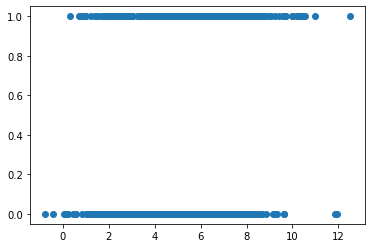

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X,Y)
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)
cnt0 = 0
for ele in y_train:
    if(ele==0):
        cnt0+=1

for ele in y_test:
    if(ele==0):
        cnt0+=1
print(cnt0)
print(len(y_train) - cnt0)

X_train = X_train.reshape((len(X_train), 1))
y_train = y_train.reshape((len(y_train), 1))
X_test = X_test.reshape((len(X_test), 1))
y_test = y_test.reshape((len(y_test), 1))

383
307


In [ ]:
clf = LogisticRegression(random_state=0)

In [ ]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6065573770491803


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 4), random_state=1)
clf = clf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = clf.predict(X_test)

     sentiment_value       Date    average
0           4.943019   1/2/2015  27.348751
1           1.014909   1/5/2015  26.757500
2           2.509605   1/6/2015  26.507500
3           3.265148   1/7/2015  26.862499
4           8.972554   1/8/2015  27.606250
..               ...        ...        ...
807         6.657773  3/22/2018  42.660000
808         3.560382  3/23/2018  41.857501
809         9.615179  3/26/2018  42.442501
810         4.131726  3/27/2018  42.758749
811         3.502371  3/28/2018  41.901251

[812 rows x 3 columns]


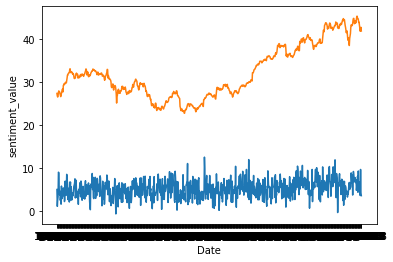

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('sample_data/apple_final2.csv')
#df1= df[['sentiment_value','close-open']]
#df2= df[['sentiment_value','highi-high(i-1)']]
#sns.lmplot(x ="sentiment_value", y ="close-open", data = df1, order = 2, ci = None, scatter_kws={"s": 5})
#plt.show()
averageval=df['Low'].to_numpy()
averageval+=df['High'].to_numpy()
averageval/=2
df['average']=averageval
df['sentiment_value'] = df['sentiment_value']
df1=df[['sentiment_value','Date','average']]
print(df1)
sns.lineplot(x ='Date', y='sentiment_value', data=df1)
sns.lineplot(x ='Date', y='average', data=df1)
plt.show()

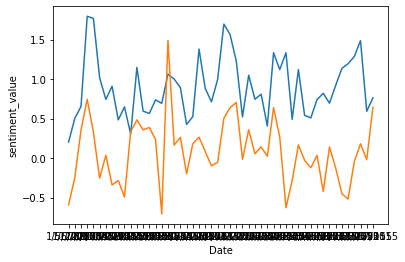

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('sample_data/apple_final2.csv')
df1=df[['sentiment_value','Date','yvalue']]
#df1= df[['sentiment_value','close-open']]
#df2= df[['sentiment_value','highi-high(i-1)']]
#sns.lmplot(x ="sentiment_value", y ="close-open", data = df1, order = 2, ci = None, scatter_kws={"s": 5})
#plt.show()
#df1=df[['sentiment_value','Date','average']]
# print(df1)
df1=df1.head(51)
df1=df1[1:]
df1['sentiment_value']*=0.2
sns.lineplot(x ='Date', y='sentiment_value', data=df1)
sns.lineplot(x ='Date', y='yvalue', data=df1)
plt.show()
#x=np.array(df['sentiment_value'])
#x1=

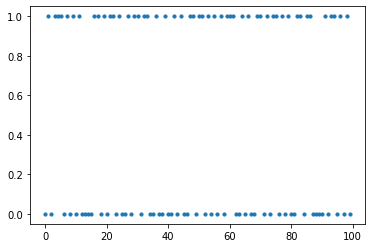

0.033324818989807214


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def score(predict,actual):
    s=0
    pred=[]
    act=[]
    for i in range(1,len(predict)):
        if predict[i]>=predict[i-1] and actual[i]>=actual[i-1]:
            s+=1
            pred.append(1)
            act.append(1)
        elif predict[i]<predict[i-1] and actual[i]<actual[i-1]:
            s+=1
            pred.append(0)
            act.append(0)
        elif predict[i]<predict[i-1] and actual[i]>=actual[i-1]:
            pred.append(0)
            act.append(1)
        else:
            pred.append(1)
            act.append(0)
    return (s/(len(predict)-1),pred,act)

df = pd.read_csv('sample_data/apple_final2.csv')
#df1= df[['sentiment_value','close-open']]
#df2= df[['sentiment_value','highi-high(i-1)']]
#sns.lmplot(x ="sentiment_value", y ="close-open", data = df1, order = 2, ci = None, scatter_kws={"s": 5})
#plt.show()
#df1=df[['sentiment_value','Date','average']]
# print(df1)

x =np.array(df['sentiment_value']).reshape(-1,1)
y=np.array(df['avgprice']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
prediction=regr.predict(X_test)
values=score(prediction,y_test)
indexes=list(range(0,len(prediction)))
plt.scatter(indexes[0:100],values[1][0:100],s=10)
#plt.scatter(indexes[0:100],values[2][0:100],s=10)
plt.show()
print(regr.score(X_test, y_test))

In [ ]:
df

,Unnamed: 0,Date,sentiment_value,yesterday_sentiment,Open,High,Low,Close,Volume,avgprice,yvalue,average
0,0,1/2/2015,4.943019,0.000000,27.847500,27.860001,27.348751,27.332500,212818400,27.348751,27.348751,27.348751
1,1,1/5/2015,1.014909,4.943019,27.072500,27.162500,26.757500,26.562500,257142000,26.757500,-0.591250,26.757500
2,2,1/6/2015,2.509605,1.014909,26.635000,26.857500,26.507500,26.565001,263188400,26.507500,-0.250001,26.507500
3,3,1/7/2015,3.265148,2.509605,26.799999,27.049999,26.862499,26.937500,160423600,26.862499,0.355000,26.862499
4,4,1/8/2015,8.972554,3.265148,27.307501,28.037500,27.606250,27.972500,237458000,27.606250,0.743750,27.606250
...,...,...,...,...,...,...,...,...,...,...,...,...
807,807,3/22/2018,6.657773,5.250375,42.500000,43.169998,42.660000,42.212502,165963200,42.660000,-0.633749,42.660000
808,808,3/23/2018,3.560382,6.657773,42.097500,42.480000,41.857501,41.235001,164115200,41.857501,-0.802500,41.857501
809,809,3/26/2018,9.615179,3.560382,42.017502,43.275002,42.442501,43.192501,150164800,42.442501,0.585001,42.442501
810,810,3/27/2018,4.131726,9.615179,43.419998,43.787498,42.758749,42.084999,163690400,42.758749,0.316248,42.758749


In [ ]:
x = df[['sentiment_value', 'yesterday_sentiment', 'Open', 'High', 'Low', 'Close', 'Volume']]
y = df[['avgprice']]

In [ ]:
df2 = x
df2 = pd.DataFrame(df2)     
future_days = 50
df2['Prediction'] = df['avgprice'].shift(-future_days)
df2

,sentiment_value,yesterday_sentiment,Open,High,Low,Close,Volume,Prediction
0,4.943019,0.000000,27.847500,27.860001,26.837500,27.332500,212818400,31.621250
1,1.014909,4.943019,27.072500,27.162500,26.352501,26.562500,257142000,31.941251
2,2.509605,1.014909,26.635000,26.857500,26.157499,26.565001,263188400,32.081250
3,3.265148,2.509605,26.799999,27.049999,26.674999,26.937500,160423600,31.695000
4,8.972554,3.265148,27.307501,28.037500,27.174999,27.972500,237458000,31.796249
...,...,...,...,...,...,...,...,...
807,6.657773,5.250375,42.500000,43.169998,42.150002,42.212502,165963200,NaN
808,3.560382,6.657773,42.097500,42.480000,41.235001,41.235001,164115200,NaN
809,9.615179,3.560382,42.017502,43.275002,41.610001,43.192501,150164800,NaN
810,4.131726,9.615179,43.419998,43.787498,41.730000,42.084999,163690400,NaN


In [ ]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
y = np.array(df2['Prediction'])[:-future_days]

<ipython-input-131-b2796d29d563>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-133-4ab4510f9901>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


array([[ 4.90848485e+00,  5.61039322e+00,  4.16500020e+01,
         4.21250000e+01,  4.13200000e+01,  4.20275000e+01,
         1.65573600e+08],
       [ 6.95530303e+00,  4.90848485e+00,  4.35000000e+01,
         4.35649990e+01,  4.27799990e+01,  4.31250000e+01,
         2.37594400e+08],
       [ 6.21445815e+00,  6.95530303e+00,  4.30924990e+01,
         4.37475010e+01,  4.29300000e+01,  4.35625000e+01,
         1.40105200e+08],
       [ 6.49293470e+00,  6.21445815e+00,  4.34775010e+01,
         4.38125000e+01,  4.34000020e+01,  4.37024990e+01,
         9.74460000e+07],
       [ 5.24396465e+00,  6.49293470e+00,  4.36650010e+01,
         4.40600010e+01,  4.35825000e+01,  4.40600010e+01,
         9.76380000e+07],
       [ 4.73487602e+00,  5.24396465e+00,  4.37775000e+01,
         4.40250020e+01,  4.32850000e+01,  4.39700010e+01,
         1.17930400e+08],
       [ 4.73451900e+00,  4.73487602e+00,  4.37775000e+01,
         4.38450010e+01,  4.35675010e+01,  4.36675000e+01,
         1.0058200

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[42.54707008 43.00237068 44.17987838 44.42058806 44.79967502 44.78682452
 44.39209898 44.48588327 43.67200458 42.79696985 43.59652601 43.3452465
 43.58931983 44.06468623 44.11211963 44.36260347 44.30388674 44.14441536
 43.33689582 43.66132875 43.26275095 43.02938165 43.30806775 43.13085906
 43.02629615 42.92881209 43.82864003 43.57048245 43.79254026 43.71746237
 43.2420484  44.68839402 44.09626647 44.59789659 44.46984202 44.48514911
 43.1930045  43.88140639 43.8604882  42.97048888 43.99807631 43.72133587
 43.82616398 44.5658781  44.430653   44.38618776 44.41472406 44.61554561
 44.88561143 45.02670215]


In [ ]:
predictions = lr_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-135-3f9450a7367b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


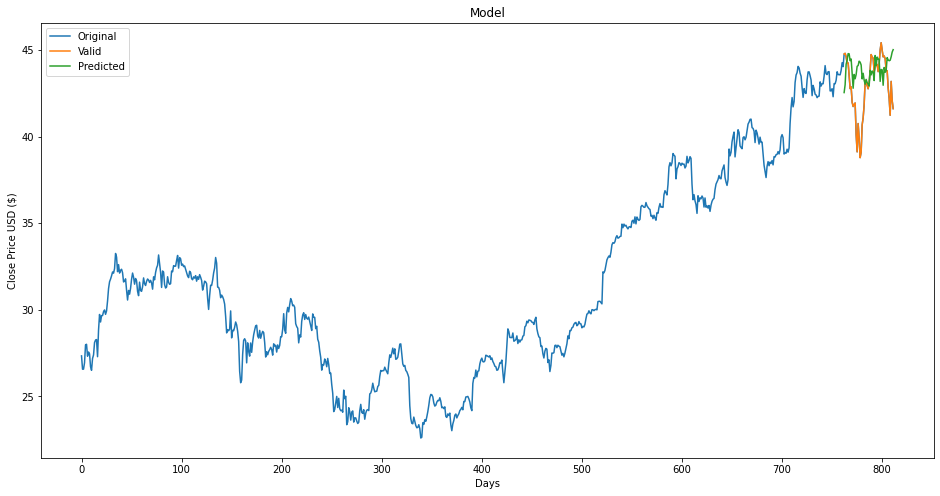

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
tree_prediction = tree.predict(x_future)
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-137-aba50418ff87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


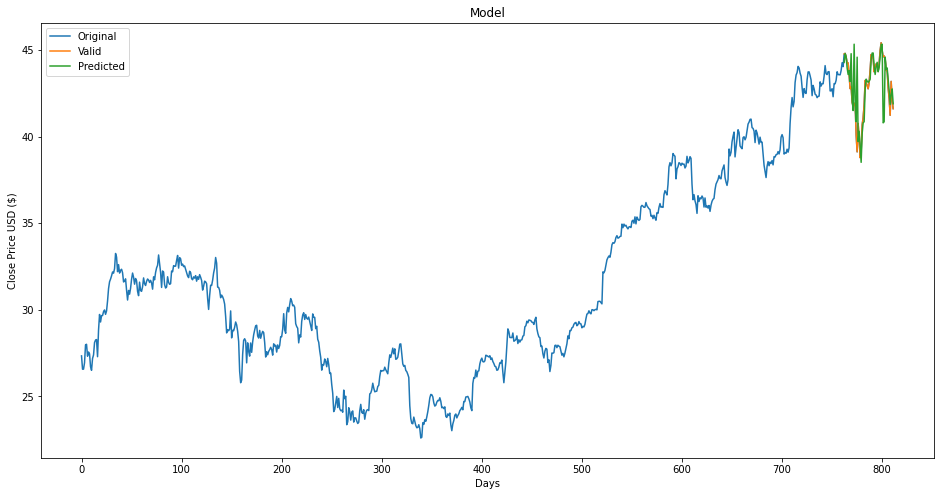

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_train = y_train.reshape(len(y_train))

In [ ]:
print(x_train.shape, y_train.shape)

(609, 7) (609,)


In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_test.shape, X_val.shape)
print(Y_train.shape, Y_test.shape, Y_val.shape)


(609, 7) (77, 7) (76, 7)
(609,) (77,) (76,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam',loss='mae')
history = model.fit(x = X_train,y = Y_train,validation_data=(X_test,Y_test),batch_size=90,epochs=15,verbose = 0)


In [ ]:
model.compile(optimizer='Adam',loss='mae')

In [ ]:
history = model.fit(x = X_train,y = Y_train,validation_data=(X_test,Y_test),batch_size=90,epochs=15,verbose = 0)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 32)                256       
                                                                 
 dense_73 (Dense)            (None, 32)                1056      
                                                                 
 dense_74 (Dense)            (None, 32)                1056      
                                                                 
 dense_75 (Dense)            (None, 16)                528       
                                                                 
 dense_76 (Dense)            (None, 16)                272       
                                                                 
 dense_77 (Dense)            (None, 16)                272       
                                                                 
 dense_78 (Dense)            (None, 16)              

In [ ]:
pred=model.predict(x_future)

2/2 [==============================] - 0s 4ms/step


In [ ]:
print(pred)

[[0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]
 [0.10499999]]


<ipython-input-206-f86e1a42e3cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


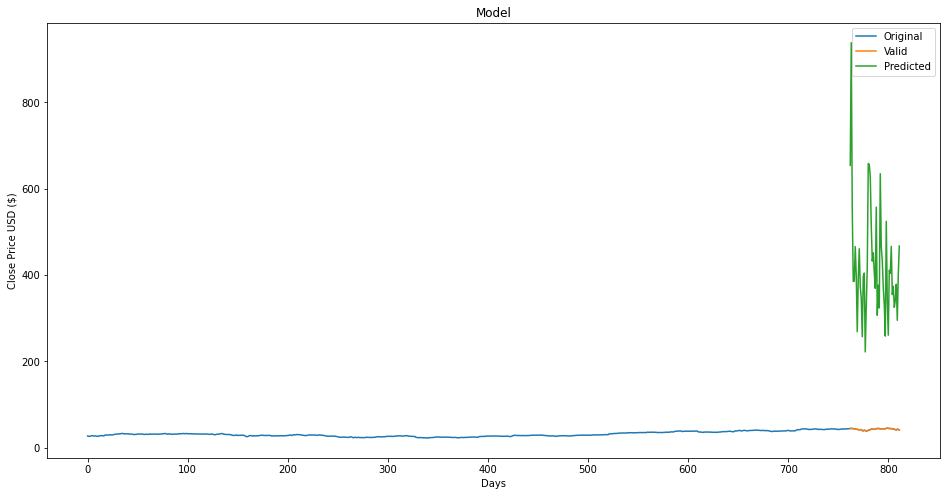

In [ ]:
predictions = pred
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

NameError: ignored

In [ ]:
model = Sequential()

# input layer
model.add(Dense(7,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')